## Project: Analysis on Netflix Movies, Documentaries, and TV Shows

### Author: Munezero Mihigo

### Date: 13 November 2021

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data
netflix_data_titles = pd.read_csv(r"../Data/Data-Netflix_titles.csv")

In [3]:
# Lets get a summary of our data set
netflix_data_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
netflix_data_titles.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
netflix_data_titles.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Dealing with missing values and NaNs

In [6]:
netflix_data_titles.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [7]:
netflix_data_titles.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
netflix_data_titles.isnull().sum().sum()

3631

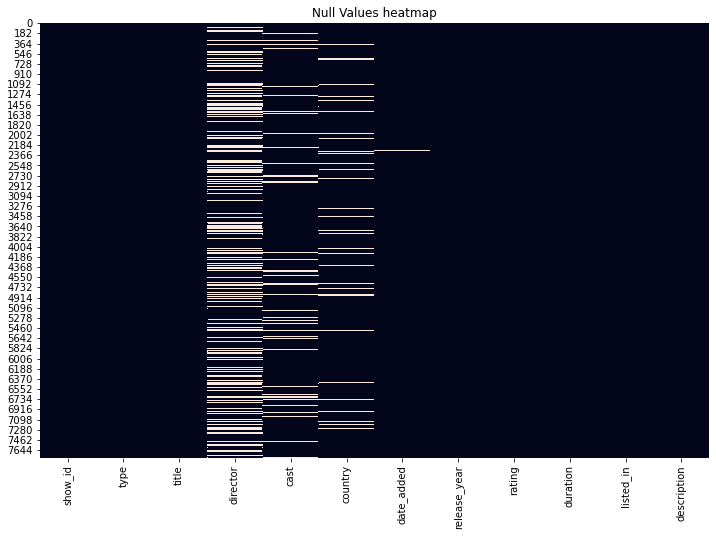

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(netflix_data_titles.isnull(),cbar=False)
plt.title('Null Values heatmap')
plt.show()

In [10]:
# Replace "No Director","cast" and "country" where respective cell is missing or nan 
netflix_data_titles['director'].replace(np.nan,'No Director', inplace =True)
netflix_data_titles['cast'].replace(np.nan,'No Cast', inplace =True)
netflix_data_titles['country'].replace(np.nan,'Country Unavailable', inplace =True)
netflix_data_titles.dropna(subset=['date_added','rating'],inplace =True)


In [11]:
netflix_data_titles.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### Netflix Movies

In [12]:
netflix_data_movies = netflix_data_titles.query('type == "Movie"')
netflix_data_movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [13]:
netflix_data_movies.duration = netflix_data_movies.duration.str.replace(' min','').astype(int)

### Netflix Shows

In [14]:
netflix_data_shows = netflix_data_titles.query('type == "TV Show"')
netflix_data_shows.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [15]:
netflix_data_shows.rename(columns={'duration':'seasons'}, inplace=True)
netflix_data_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_data_shows.seasons = netflix_data_shows.seasons.str.replace(' Seasons','').astype(int)

### Cleaned data set

In [16]:
# back to the cleaned data set
netflix_data_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Visualizations

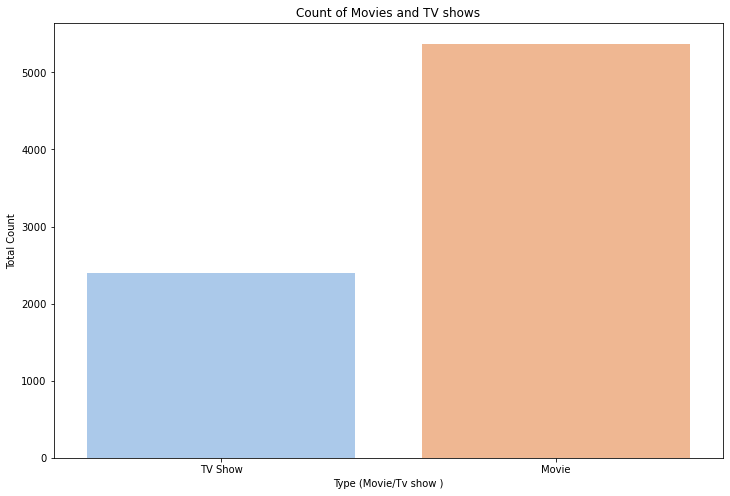

In [17]:
# Visualization of our data
plt.figure(figsize=(12,8))
g = sns.countplot(netflix_data_titles.type,palette="pastel");
plt.title('Count of Movies and TV shows')
plt.xlabel("Type (Movie/Tv show )")
plt.ylabel('Total Count')
plt.show();

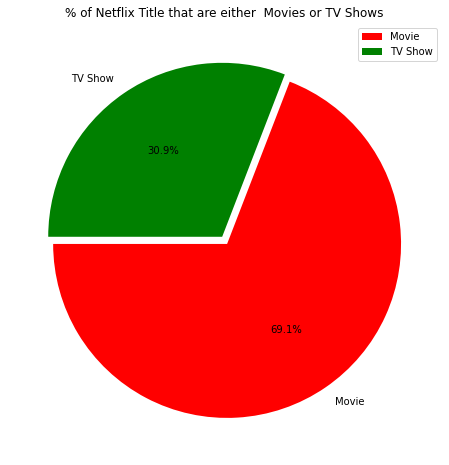

In [18]:
plt.figure(figsize=(12,8))
plt.title('% of Netflix Title that are either  Movies or TV Shows')
g = plt.pie(netflix_data_titles.type.value_counts() , explode=(.025,.025),labels =netflix_data_titles.type.value_counts().index,colors=['red','green'],autopct='%1.1f%%',startangle=180);
plt.legend()
plt.show()

In [19]:
netflix_data_titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

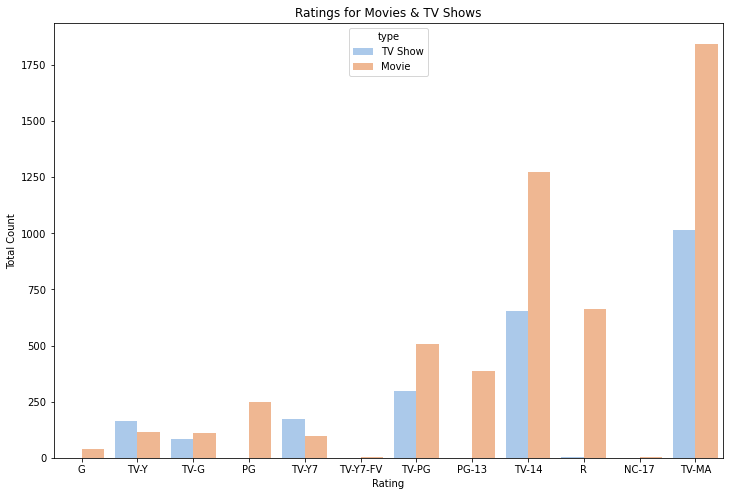

In [20]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(12,8))
g = sns.countplot(netflix_data_titles.rating, hue=netflix_data_titles.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

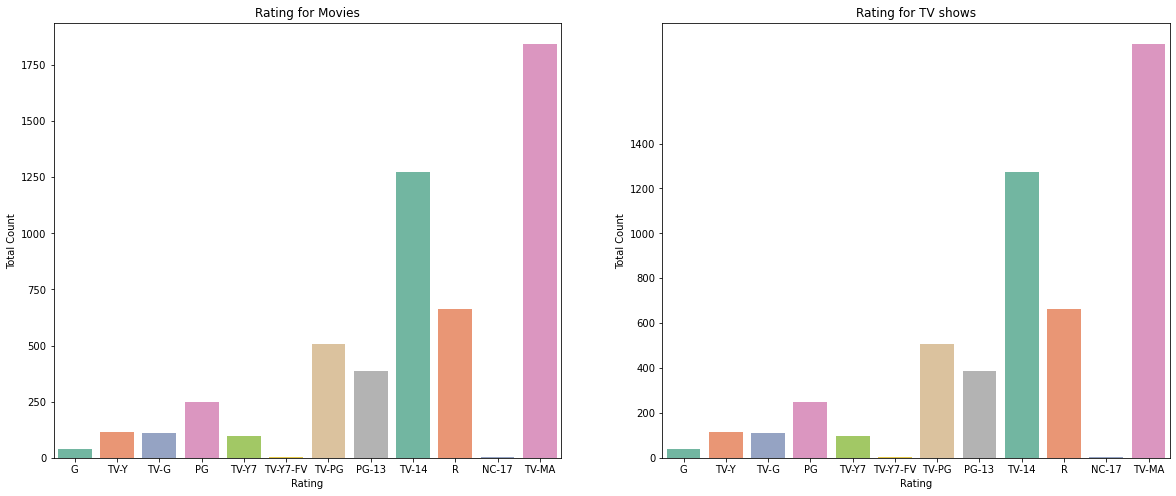

In [21]:
fig, ax=plt.subplots(1,2, figsize=(20,8))
g1=sns.countplot(netflix_data_movies.rating, order=order ,palette ="Set2",ax=ax[0]);
g1.set_title("Rating for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2=sns.countplot(netflix_data_movies.rating,order=order , palette="Set2" ,ax=ax[1])
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Rating for TV shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [22]:
netflix_data_titles['year_added'] = pd.DatetimeIndex(netflix_data_titles['date_added']).year
netflix_data_movies['year_added'] = pd.DatetimeIndex(netflix_data_movies['date_added']).year
netflix_data_shows['year_added'] = pd.DatetimeIndex(netflix_data_shows['date_added']).year
netflix_data_titles['month_added'] = pd.DatetimeIndex(netflix_data_titles['date_added']).month
netflix_data_movies['month_added'] = pd.DatetimeIndex(netflix_data_movies['date_added']).month
netflix_data_shows['month_added'] = pd.DatetimeIndex(netflix_data_shows['date_added']).month 

In [23]:
netflix_year = netflix_data_titles['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2153
2,2018,1684
3,2017,1222
4,2016,440
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11
10,2012,3


In [24]:
netflix_year2 = netflix_data_titles[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

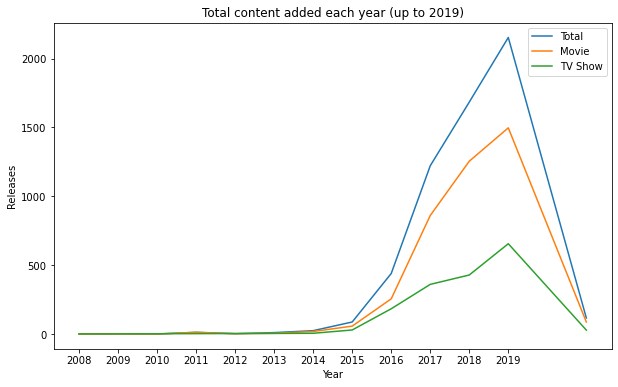

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

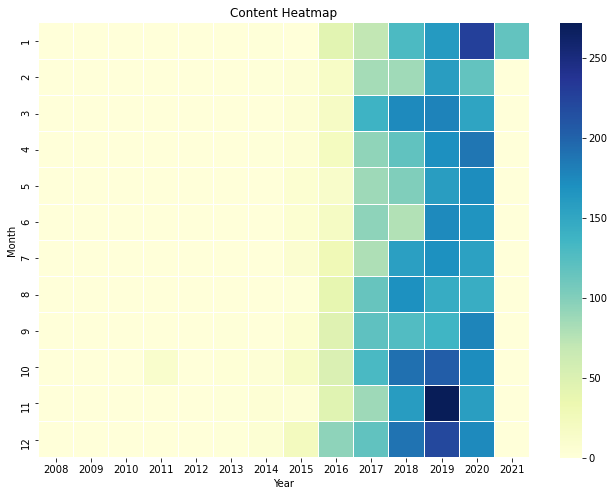

In [26]:
month_year_df = netflix_data_titles.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

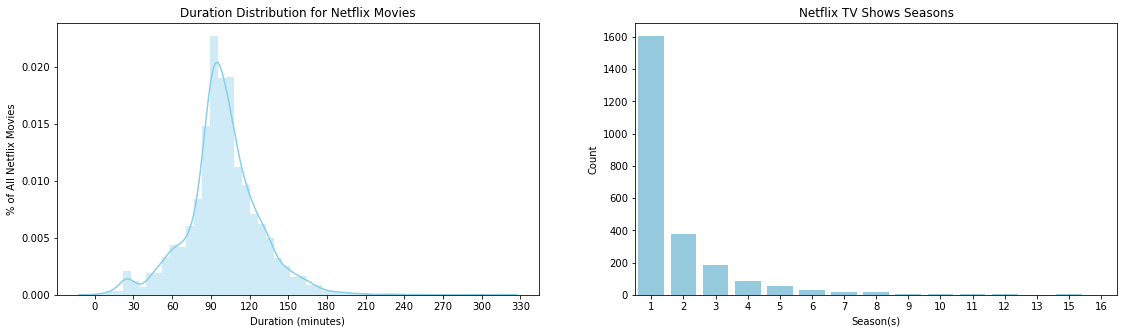

In [27]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(netflix_data_movies.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_data_shows.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

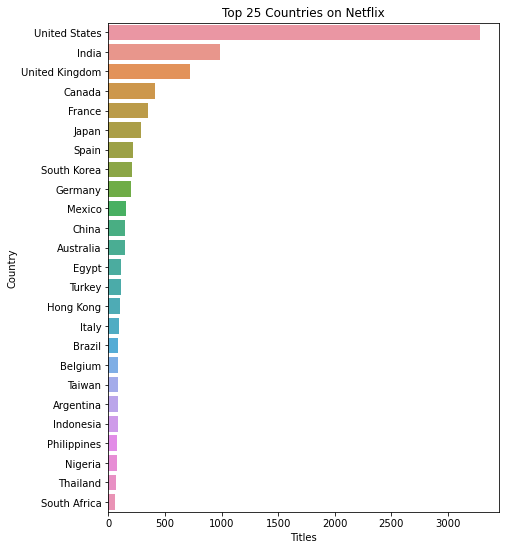

In [28]:
filtered_countries = netflix_data_titles.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:25])
plt.title('Top 25 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

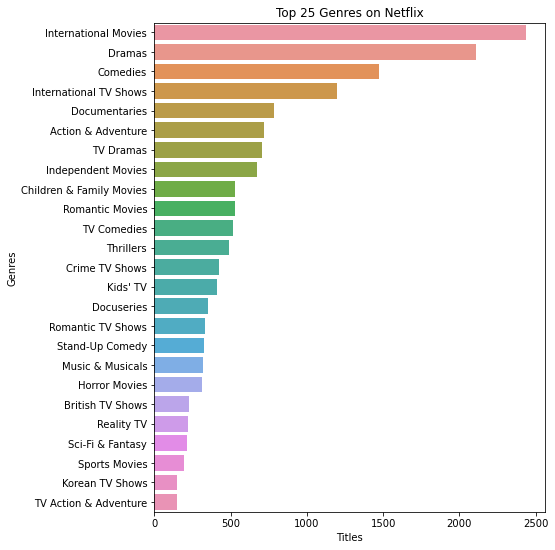

In [29]:
filtered_genres = netflix_data_titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:25])
plt.title('Top 25 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()